#**Classification Problem**

Concepts:
  
* Data Cleaning (Replaceing values,Scaling)
* Statistical Testing (Groupby method and Loops)
* Logistic Regression
* Naive Bayes
*AUC Score Interpretation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier

In [5]:
df = pd.read_csv('wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [6]:
df.shape

(569, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
# Label(1) for abnormal cases(Positive),and Label(0) for Normal cases(Negative)

df['diagnosis'].replace({'B':0,'M':1},inplace = True)

In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [12]:
# Use this to find Weak Features with the Target Varible(diagnosis)
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


The Weak Features are:
 
* texture_se
* dimension_mean
* smoothness_se
* symmetry_se
* dimension_se
* symmetry_se


All these features are weak Correlation with diagnosis(Target feature).if we are doing LogisticRegression,Naive Bayes we need to address
these weak features because these are affected by weak columns

If we are doing RandomForest or any Ensemble Technique these weak features are won't effect the result

Since we are starting with LogisticRegression.Let's address these columns by performing statistical tests

In [13]:
from scipy.stats import ttest_ind

**Scaling Regression Vs Classification**

For Regression: Scaling is not Required unless you are plannig to use Regularizaton(Ridge or Lasso) Techniques. Scaling is not
                required because in order to interpret the result we have to inverse scale it.
        
For Classification: Scaling is must because the final output will be 1 or 0 and that is simpler to interpret than Regression model.
    

https://medium.com/@nsethi610/data-cleaning-scale-and-normalize-data-4a7c781dd628 (More info about Scaling)
    
    
**However Don't Scale data for statistical model:**  because all of them have mean = 0,and std = 1, and there is no point in doing statistical tests then    

In [14]:
ttest_ind(df['diagnosis'],df['texture_se'])

Ttest_indResult(statistic=-27.444013161179843, pvalue=1.2755792087893532e-127)

since P_value(1.275e-127) < alhpa(0.05), we can conclude that texture_se is statistically significant.

In [15]:
ttest_ind(df['diagnosis'],df['smoothness_se'])

Ttest_indResult(statistic=18.01830421461817, pvalue=4.903360864341499e-64)

since P_vlaue(4.903e-64) < alpha(0.05), we can conclude that smoothness_se is statistically significant

In [18]:
for col in df:
    print(col,ttest_ind(df['diagnosis'],df[col])[1])

id 8.846576662398489e-09
diagnosis 1.0
radius_mean 0.0
texture_mean 0.0
perimeter_mean 0.0
area_mean 3.1385227829719816e-250
smoothness_mean 3.441418217756857e-39
compactness_mean 7.706959061978927e-37
concavity_mean 3.5380328981349844e-40
points_mean 1.436711502370932e-51
symmetry_mean 2.4191503672264038e-20
dimension_mean 5.1394029045253113e-48
radius_se 0.163664398906712
texture_se 1.2755792087893532e-127
perimeter_se 5.086805469042938e-136
area_se 1.0835526567745757e-82
smoothness_se 4.903360864341499e-64
compactness_se 1.685294716445057e-58
concavity_se 1.6321124519370055e-56
points_se 1.3270224937831696e-62
symmetry_se 5.298535632728561e-60
dimension_se 5.139070369527091e-65
radius_worst 0.0
texture_worst 0.0
perimeter_worst 0.0
area_worst 2.1519227514728112e-196
smoothness_worst 1.596179629637546e-30
compactness_worst 3.624274022759562e-08
concavity_worst 6.0973167768864224e-06
points_worst 3.5895164594447605e-34
symmetry_worst 5.844639711947698e-05
dimension_worst 2.41502390057

In [19]:
my_set = ['texture_se','dimension_mean','smoothness_se','symmetry_se','dimension_se','symmetry_mean']

In [20]:
AG = df.groupby('diagnosis')

In [22]:
AG_0 = AG.get_group(0)
AG_1 = AG.get_group(1)

In [24]:
for col in my_set:
    P_value = ttest_ind(AG_0[col],AG_1[col])[1]
    print(col,P_value)

texture_se 0.8433320287670163
dimension_mean 0.7599368037256238
smoothness_se 0.11029660865789295
symmetry_se 0.8766418183858812
dimension_se 0.06307355082239346
symmetry_mean 5.733384028466827e-16


In [26]:
# we ran the same loop for all the columns

for col in df.columns:
    P_value = ttest_ind(AG_0[col],AG_1[col])[1]
    print(col,P_value)

id 0.34368185775951265
diagnosis 0.0
radius_mean 8.465940572262422e-96
texture_mean 4.0586360478980736e-25
perimeter_mean 8.43625103617473e-101
area_mean 4.734564310307614e-88
smoothness_mean 1.0518503592035268e-18
compactness_mean 3.938263105886996e-56
concavity_mean 9.966555755072396e-84
points_mean 7.101150161057422e-116
symmetry_mean 5.733384028466827e-16
dimension_mean 0.7599368037256238
radius_se 9.738948656461507e-50
texture_se 0.8433320287670163
perimeter_se 1.6519051758498057e-47
area_se 5.8955213926058635e-46
smoothness_se 0.11029660865789295
compactness_se 9.975994654074946e-13
concavity_se 8.260176167969961e-10
points_se 3.072308768818131e-24
symmetry_se 0.8766418183858812
dimension_se 0.06307355082239346
radius_worst 8.482291921684414e-116
texture_worst 1.0780574879493625e-30
perimeter_worst 5.771397139670263e-119
area_worst 2.828847704286693e-97
smoothness_worst 6.575143633984769e-26
compactness_worst 7.069816352539082e-55
concavity_worst 2.4646639567829224e-72
points_wor

In this Groupby approach we found out that 'texture_se','dimension_mean','smoothness_se','symmetry_se','dimension_se','symmetry_mean' are non-significant features.we will drop these features for parametric testing(Logstic Regression)

Groupby approach is must robust because it first sepearates records based on 0 and 1. The previously ran loop does not do this that is why we got some results as significant.Notice,in the Original loop we got 'radiou_se' as insignificant feature but in Groupby approach we got it as significant feature that is why Groupby is Robust method.

we don't have to drop this for non-parametric test such as RandomForest



In [27]:
# no null_value and no data cleaning required

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null int64
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se     

# Model Building

Logistic Regression and Naive Bayes:
    
    1.Define X,Y
    2.Scale data
    3.Build the Model
    4.Interpret the Results

In [28]:
X = df.drop(['id','diagnosis','texture_se','dimension_mean','smoothness_se','symmetry_se','dimension_se','symmetry_mean'],axis = 1)
Y = df['diagnosis']

In [29]:
sc = StandardScaler()
x_std = sc.fit_transform(X)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier

In [36]:
LR = LogisticRegression()
NB = GaussianNB()

In [38]:
Models = []
Models.append(('Logistic Regression',LR))
Models.append(('Naive Bayes',NB))

Logistic Regression: 0.995752 (0.000016)
Naive Bayes: 0.984032 (0.000144)


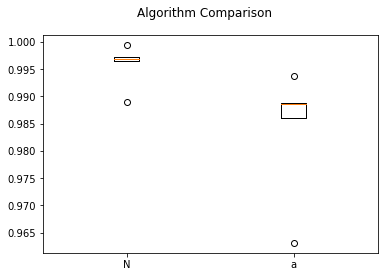

In [43]:
# Evaluate each model in turn

results = []
names = []
for name , model in Models:
    kfold = model_selection.KFold(shuffle = True,n_splits = 5,random_state = 0)
    cv_results = model_selection.cross_val_score(model,x_std,Y,cv = kfold,scoring = 'roc_auc') # for binary Classification we use metric rou_auc for multiclass classification the metric we use f1_weighted
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(cv_results),np.var(cv_results,ddof = 1)))
    
    
# Boxplot Algorithm Comparision

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name)
plt.show()

**Interpretation**

* Area Under Reciever Operating Curve(AUC): AUC Provides an Aggregate Measure Of Performance across all Possible Classification Threshold

* ROC AUC Score of 0.995 means there is 99.5% chance that the Radiologist who is looking at scanned images can correctly distinguish a normal from a abnormal Patient


* Since, the data is not complex we are able to achive AUC Score of 0.995 using Logistic Regression(LOg R) and 0.983 using Naive Bayes(NB).
  In terms of Bias Error and Variance Error Logistic Regression has OutPerformed Naive Bayes in both Metrics.By getting a Higher AUC Score Log R has outperformed Naive Bayes interms of Bias Error and by getting a lower variance error than NB is has also outperformed NB
  

Link: https://www.sciencedirect.com/science/article/pii/S1556086415306043 (More info about AUC)